<a href="https://colab.research.google.com/github/solomonsrajkumar/AIMLMod5/blob/main/Coupon_Analysis5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
#Check for Null values in the data set
data.isna().sum()

,0
destination,0
passanger,0
weather,0
temperature,0
time,0
coupon,0
expiration,0
gender,0
age,0
maritalStatus,0


In [5]:
#Check Duplicate records in the data
data[data.duplicated()]

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
4192,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,less1,less1,1,1,1,0,1,1
4236,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,26,Single,...,gt8,gt8,4~8,less1,1,1,1,0,1,1
4280,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,26,Single,...,never,4~8,1~3,less1,1,1,1,0,1,1
4324,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,46,Single,...,never,4~8,1~3,1~3,1,1,1,0,1,1
4409,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,21,Single,...,never,less1,1~3,never,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8511,Home,Alone,Sunny,80,6PM,Bar,2h,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,0,0,1,0,1
8512,Home,Partner,Sunny,30,10PM,Carry out & Take away,2h,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,1,0,0,1,1
8513,Work,Alone,Rainy,55,7AM,Restaurant(<20),2h,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,1,1,0,1,0
8515,Work,Alone,Snowy,30,7AM,Restaurant(20-50),1d,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,1,1,0,1,0


3. Decide what to do about your missing data -- drop, replace, other...

In [7]:
#Drop column car as it has the most missing data
data.drop(columns=['car'], inplace=True)

In [9]:
#Drop records with Null values, as it is less than 5% of the total data.
data=data.dropna()

In [10]:
#Drop duplicate records
data=data.drop_duplicates()
data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


4. What proportion of the total observations chose to accept the coupon?



In [11]:
#Coupon acceptane percentage-- 57%
coupon_accpt_pct=data.query('Y == 1')['Y'].value_counts().iloc[0]/data.count().iloc[0]
coupon_accpt_pct.round(2)

np.float64(0.57)

5. Use a bar plot to visualize the `coupon` column.

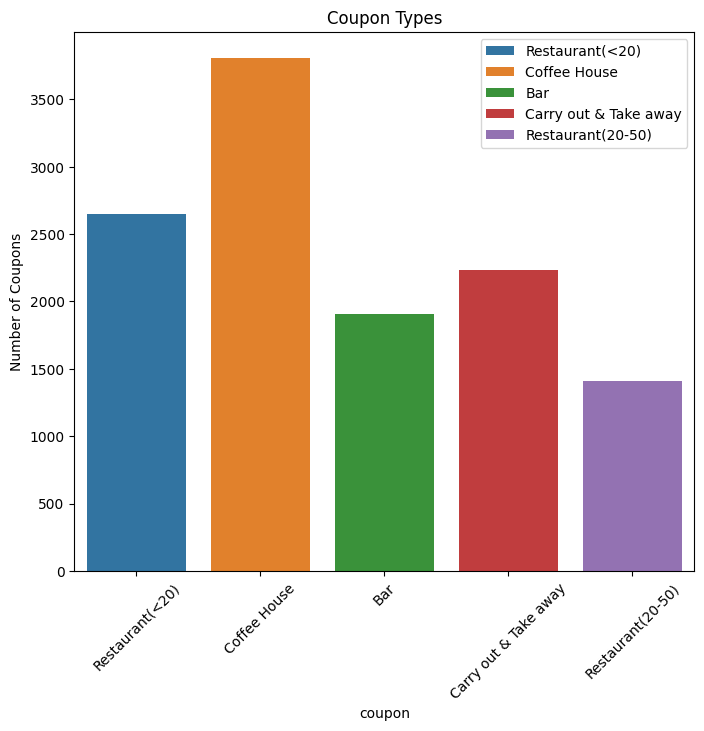

In [13]:
plt.figure(figsize=(8,7))
sns.countplot(data=data ,x='coupon',hue='coupon')
plt.legend(labels = ['Restaurant(<20)', 'Coffee House', 'Bar' ,'Carry out & Take away',
       'Restaurant(20-50)'])
plt.xticks(rotation=45)
plt.title('Coupon Types')
plt.ylabel("Number of Coupons") ;

6. Use a histogram to visualize the temperature column.

Text(0, 0.5, 'Frequency')

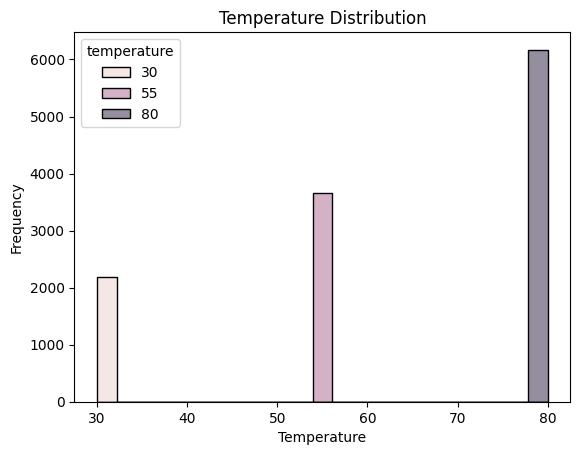

In [14]:
#data['temperature'].hist()
sns.histplot(data=data,x='temperature',hue='temperature')
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [15]:
bar_coupons=data.query('coupon == "Bar"')
bar_coupons.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0


2. What proportion of bar coupons were accepted?


In [17]:
#Bar Coupon acceptane percentage-- 41%
bar_coupons['Y'].mean().round(2)

np.float64(0.41)

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


The  visualization compares data between drivers who visits bars more than 3 times a month and drivers who visit bars less than 3 times. Below is the understanding based on the plot.

1) People  tend to visit bar 3 or more times has accepted coupons 39% more than people who went to bar less or equal to 3 times.
2) People  visited bar more than 3 times is less than the sample data for people who went to bar less or equal to 3 times.
3) This suggests a positive correlation between frequent bar visits and willingness to accept coupons.

                    sum  count  mean
bar_visit                           
3 visits or less    638   1713  0.37
More than 3 visits  147    193  0.76


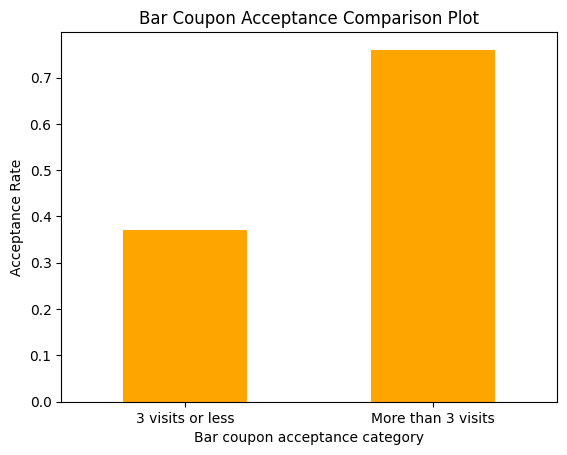

In [20]:
# @title Default title text
## Make sure bar_coupons is a copy, before adding additional columns
bar_coupons = bar_coupons.copy()
bar_coupons.loc[:,"bar_visit"]=np.where((bar_coupons['Bar'].isin(['never', 'less1', '1~3'])), '3 visits or less'
                                  ,'More than 3 visits')
print(bar_coupons.groupby("bar_visit")["Y"].agg(['sum','count','mean']).round(2))
bar_coupons.groupby("bar_visit")["Y"].mean().round(2).plot(kind='bar',color='orange',xlabel='Bar coupon acceptance category',
                ylabel='Acceptance Rate',title='Bar Coupon Acceptance Comparison Plot');

plt.xticks(rotation=0);

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


The  visualization below compares data between drivers who are above 25 that go to bars more than once a month with the rest.

69% of 25 and older guys go to the bar  compared to 34% of the younger population.


          sum  count  mean
driv_per                  
<1 Visit  507   1503  0.34
>1 Visit  278    403  0.69


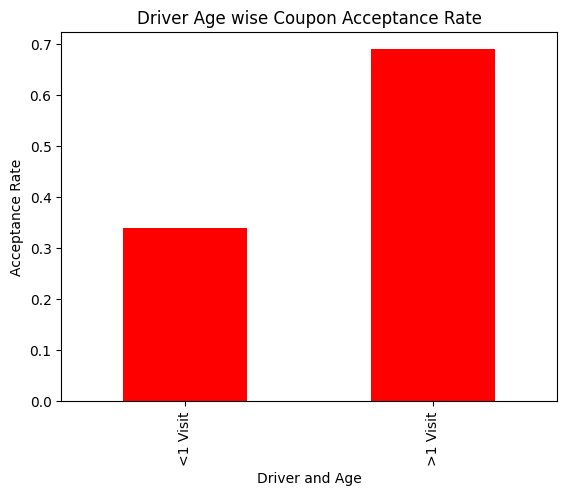

In [23]:
# Calculate the mean for customers who went to the bar more than 1 time and are above 25 years old.

bar_coupons.loc[:,'driv_per']=np.where((bar_coupons['Bar'].isin(['1~3','4~8','gt8']) & (~bar_coupons['age'].isin(['below21','21']))), '>1 Visit','<1 Visit')

print(bar_coupons.groupby("driv_per")["Y"].agg(['sum','count','mean']).round(2))
bar_coupons.groupby("driv_per")["Y"].mean().round(2).plot(kind='bar',color='red',xlabel= 'Driver and Age',
               ylabel='Acceptance Rate',title='Driver Age wise Coupon Acceptance Rate');

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


The visualization compares coupon acceptance rates among drivers without child passengers, who visit bars more than once a month, and whose occupations are outside of farming, fishing, or forestry. Key insights from the plot:

The highest acceptance rates are observed in drivers working in community & social services, protective services, construction & extraction, healthcare support, and architecture & engineering.


                                           sum  count  mean
occupation                                                 
Education&Training&Library                   8     20  0.40
Building & Grounds Cleaning & Maintenance    1      2  0.50
Retired                                      2      4  0.50
Transportation & Material Moving             7     13  0.54
Installation Maintenance & Repair            5      9  0.56
Computer & Mathematical                     27     47  0.57
Legal                                       10     17  0.59
Business & Financial                        15     25  0.60
Life Physical Social Science                 2      3  0.67
Student                                     43     64  0.67
Sales & Related                             42     61  0.69
Personal Care & Service                      6      8  0.75
Office & Administrative Support             30     39  0.77
Arts Design Entertainment Sports & Media    17     22  0.77
Healthcare Practitioners & Technical    

<Axes: xlabel='occupation'>

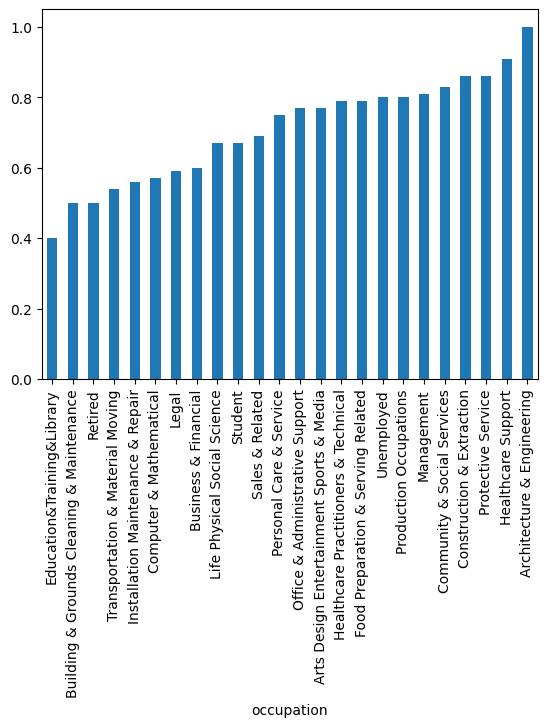

In [25]:
acpt_rt_occup =bar_coupons.query("passanger != 'Kid(s)' and Bar not in ('never', 'less1') and occupation != ('Farming Fishing & Forestry')").groupby("occupation")["Y"].agg(['sum','count','mean']).round(2).sort_values(by='mean')
print(acpt_rt_occup)
acpt_rt_occup['mean'].plot(kind="bar")

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



   Bar  passanger  count  sum  mean
0  1~3      Alone    215  140  0.65
1  1~3  Friend(s)     75   62  0.83
2  1~3    Partner     55   32  0.58
3  4~8      Alone    100   82  0.82
4  4~8  Friend(s)     25   18  0.72
5  4~8    Partner     15   10  0.67
6  gt8      Alone     26   19  0.73
7  gt8  Friend(s)     16   11  0.69
8  gt8    Partner      3    2  0.67


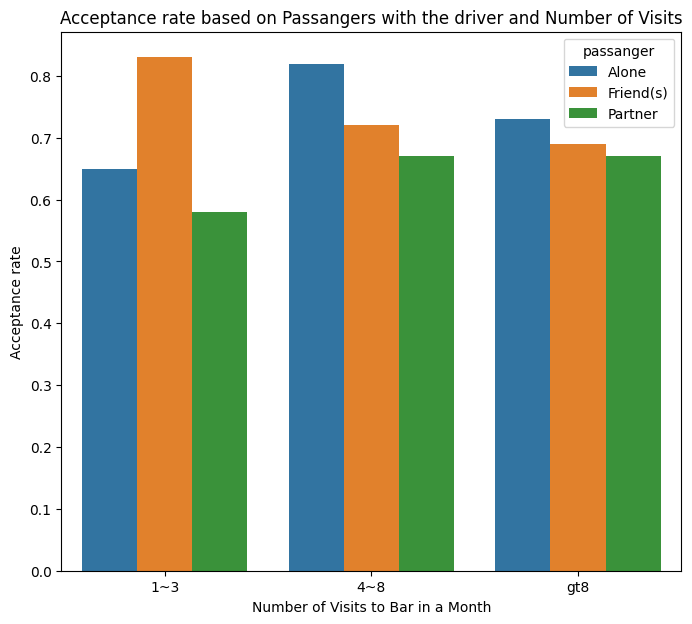

In [26]:
# go to bars more than once a month, had passengers that were not a kid, and were not widowed
plt.figure(figsize=(8,7))
coupon_group=bar_coupons.query("Bar not in ('never','less1') and passanger!='Kid(s)' and maritalStatus != 'widowed'").groupby(['Bar','passanger'],as_index=False)['Y'].agg(['count','sum','mean']).sort_values(by='Bar').round(2)
print(coupon_group)
sns.barplot(coupon_group,x='Bar',y='mean',hue='passanger')
plt.title("Acceptance rate based on Passangers with the driver and Number of Visits")
plt.xlabel("Number of Visits to Bar in a Month")
plt.ylabel("Acceptance rate");

The visualization analyzes drivers without kids as passengers, who visit bars more than once a month and are not widowed. Key insights:


Drivers visiting bars fewer than 3 times per month are more likely to accept coupons when alone or with friends than with a partner.

Overall, coupon acceptance increases with bar visit frequency.


In [35]:
bar_coupons.loc[:, 'age'] = np.where(
    bar_coupons['age'].isin(['21', '26']),
    '21 - 30',
    bar_coupons['age']  # keep the original value
)
# # - go to bars more than once a month and are under the age of 30
# Filter to just '21 - 30' age group and frequent bar visitors
age_bar_group = bar_coupons.query(
    "Bar not in ('never','less1') and age == '21 - 30'"
).groupby(['Bar', 'age'], as_index=False)['Y'].agg(['count', 'sum', 'mean']).reset_index().round(2)

# Display the grouped summary
print(age_bar_group)
px.bar(
    age_bar_group,
    x='Bar',
    y='mean',
    color='age',
    labels={'Bar': 'Number of Bar Visits', 'mean': 'Coupon Acceptance Rate'},
    title='Coupon Acceptance Rate for Age Group 21-30 by Bar Visit Frequency'
)

   index  Bar      age  count  sum  mean
0      0  1~3  21 - 30    192  130  0.68
1      1  4~8  21 - 30     96   77  0.80
2      2  gt8  21 - 30     30   25  0.83


  RestaurantLessThan20            income  count  sum  mean
0                  4~8   $12500 - $24999    424  229  0.54
1                  4~8   $25000 - $37499    414  237  0.57
2                  4~8   $37500 - $49999    348  213  0.61
3                  4~8  Less than $12500    349  204  0.58
4                  gt8   $12500 - $24999    164   99  0.60
5                  gt8   $25000 - $37499    132   87  0.66
6                  gt8   $37500 - $49999    264  175  0.66
7                  gt8  Less than $12500    109   83  0.76


Text(0.5, 1.0, 'Customers visiting Value Resturants')

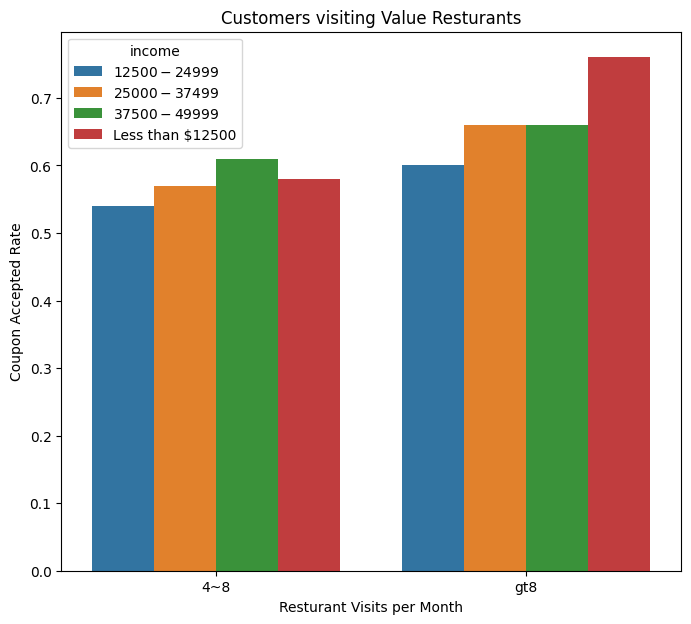

In [29]:
 #go to cheap restaurants more than 4 times a month and income is less than 50K. - on the original dataframe data
plt.figure(figsize=(8,7))
less_than_50000= [ '$12500 - $24999','$37500 - $49999', '$25000 - $37499', 'Less than $12500']
income_group=data.query("RestaurantLessThan20 in ('4~8','gt8') and income in @less_than_50000").groupby(['RestaurantLessThan20','income'],as_index=False)['Y'].agg(['count','sum','mean']).sort_values(by='RestaurantLessThan20').round(2)
print(income_group)
 sns.barplot(income_group,x='RestaurantLessThan20',y='mean',hue='income')

 plt.xlabel('Resturant Visits per Month')
 plt.ylabel('Coupon Accepted Rate')
 plt.title('Customers visiting Value Resturants')

Coupon acceptance is higher among lower-income drivers in both the 4–8 and 8+ visits/month categories.

Acceptance is notably high in the $37,500–$49,999 income group across both categories.

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Drivers accompanied by friends are more likely to accept bar coupons compared to those traveling alone or with family.

Coupon acceptance increases with bar visit frequency, suggesting a positive relationship between familiarity with bars and willingness to use coupons.

Age influences coupon acceptance, with older age groups showing higher acceptance rates than younger drivers.



### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

Let us explore Restaurant20To50 coupon

In [42]:
Restaurant20To50_df=data.query('coupon == "Restaurant(20-50)"')

In [43]:
Restaurant20To50_df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
36,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
40,Work,Alone,Sunny,80,7AM,Restaurant(20-50),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
58,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Male,46,Single,...,4~8,1~3,1~3,never,1,1,0,0,1,0
62,Work,Alone,Sunny,80,7AM,Restaurant(20-50),1d,Male,46,Single,...,4~8,1~3,1~3,never,1,1,0,0,1,0
80,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Male,46,Married partner,...,1~3,1~3,1~3,less1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12657,Home,Alone,Sunny,80,6PM,Restaurant(20-50),1d,Male,31,Married partner,...,never,4~8,gt8,less1,1,0,0,1,0,0
12661,Work,Alone,Sunny,80,7AM,Restaurant(20-50),2h,Male,31,Married partner,...,never,4~8,gt8,less1,1,0,0,1,0,0
12669,No Urgent Place,Partner,Sunny,30,10AM,Restaurant(20-50),1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12676,Home,Alone,Sunny,80,6PM,Restaurant(20-50),1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1


Does weather influence on coupon acceptance rate for going to an expensive restaurent ?.


weather
Snowy    0.32
Rainy    0.38
Sunny    0.47
Name: Y, dtype: float64


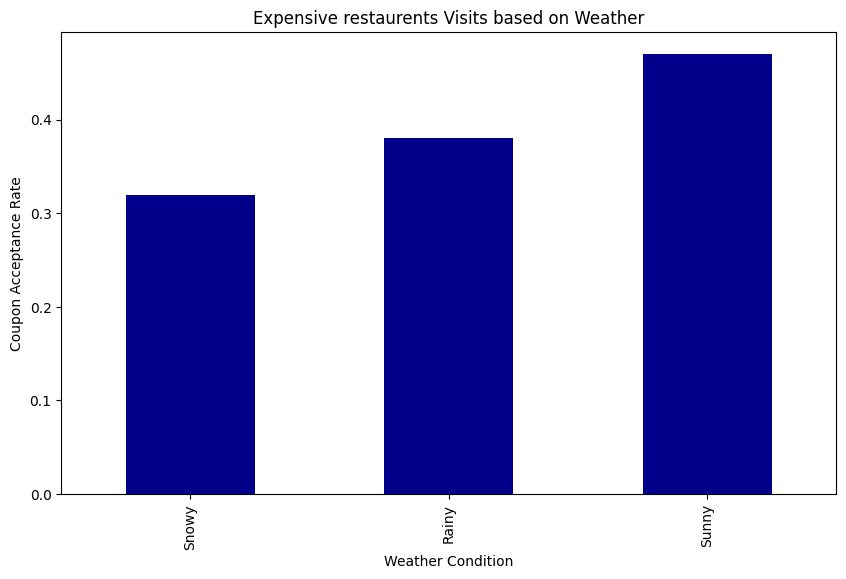

In [44]:
Restaurant20To50_cpn =Restaurant20To50_df.groupby("weather")["Y"].mean().round(2).sort_values()
print(Restaurant20To50_cpn)
plt.figure(figsize=(10, 6))
Restaurant20To50_cpn.plot(kind="bar",color='darkblue')
plt.title("Expensive restaurents Visits based on Weather")
plt.xlabel("Weather Condition")
plt.ylabel("Coupon Acceptance Rate");

Based on above plot we can hypothize that coupon acceptance is higher on Sunny days.



2. Compare this coupon acceptance rate between people travelling alone and all other categories?


                  sum  count  mean
with_passanger                    
Visited Alone     412    959  0.43
With a Passanger  219    454  0.48


/tmp/ipython-input-45-2682714169.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



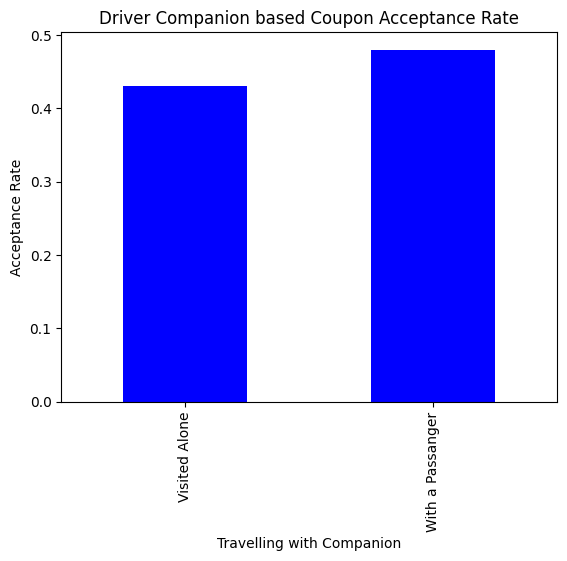

In [45]:
# Calculate the mean for customers who accepeted expensive restuarents when travelling alone or otherwise.

Restaurant20To50_df.loc[:,'with_passanger']=np.where((Restaurant20To50_df['passanger']=='Alone'), 'Visited Alone','With a Passanger')

print(Restaurant20To50_df.groupby("with_passanger")["Y"].agg(['sum','count','mean']).round(2))
Restaurant20To50_df.groupby("with_passanger")["Y"].mean().round(2).plot(kind='bar',color='blue',xlabel= 'Travelling with Companion',
               ylabel='Acceptance Rate',title='Driver Companion based Coupon Acceptance Rate');

Based on the above plot we can hyopthesis that when the drivers are with a companion they tend to accept the expensive restaurent coupons.